In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [127]:
files = [  "0cpu1io_io1",
  "0cpu2io_io1",
  "0cpu2io_io2",
  "1cpu0io_cpu1",
  "1cpu1io_cpu1",
  "1cpu1io_io1",
  "1cpu2io_cpu1",
  "1cpu2io_io1",
  "1cpu2io_io2",
  "2cpu0io_cpu1",
  "2cpu0io_cpu2",
  "2cpu1io_cpu1",
  "2cpu1io_cpu2",
  "2cpu1io_io1",
  "2cpu2io_cpu1",
  "2cpu2io_cpu2",
  "2cpu2io_io1",
  "2cpu2io_io2"
]

In [128]:
dict_files = dict.fromkeys(files)

In [218]:
#Modificar esta variable con el directorio correspondiente de las mediciones 
path = "../Mediciones/mlfq_puntos_estrella/quantum_100_less/"

In [219]:
for file in files:
    text = open(path + file, 'r+')
    text = text.read()
    text = text.strip().split()
    dict_files[file] = text

Observación: Hay que asegurarse que todas las mediciones esten en el formato:

4: FLO: 201326592, ticks: 868 <br>
4: FLO: 201326592, ticks: 987  <br>
4: FLO: 201326592, ticks: 950  <br>
4: FLO: 201326592, ticks: 950  <br>
4: FLO: 201326592, ticks: 949  <br>
4: FLO: 201326592, ticks: 950  <br>

Es decir que ni en las mediciones de cpubench ni iobench hayan caracteres adicionales (como por ejemplo el $)
para qude esta manera funcione correctamente el siguiente fragmento de codigo.


In [220]:
for keys in dict_files:
    if "_io" in keys:
        list = []
        aux = dict_files[keys]
        for i in range(2, len(aux), +5):
            aux[i] = int(aux[i].replace(",", ""))
            aux[i+2] = int(aux[i+2].replace(",", ""))
            list.append(aux[i]/aux[i+2])
        dict_files[keys] = list
    if "_cpu" in keys:
        list = []
        aux = dict_files[keys]
        for i in range(2, len(aux), +5):
            aux[i] = int(aux[i].replace(",", ""))
            aux[i+2] = int(aux[i+2].replace(",", ""))
            list.append(aux[i]/1000/aux[i+2])
        dict_files[keys] = list
        

In [221]:
for keys in dict_files:
    dict_files[keys] = sum(dict_files[keys])/len(dict_files[keys])

In [222]:
labels = ['1CPU', '2CPU', '2CPU 1IO', '1CPU 1IO', '2CPU 2IO', '1CPU 2IO', '2IO', '1IO']
cpu1 = np.zeros(8)
cpu2 = np.zeros(8)
io1 = np.zeros(8)
io2 = np.zeros(8)

cpu1[0] = dict_files['1cpu0io_cpu1']
cpu1[1] = dict_files['2cpu0io_cpu1']
cpu1[2] = dict_files['2cpu1io_cpu1']
cpu1[3] = dict_files['1cpu1io_cpu1']
cpu1[4] = dict_files['2cpu2io_cpu1']
cpu1[5] = dict_files['1cpu2io_cpu1']


cpu2[1] = dict_files['2cpu0io_cpu2']
cpu2[2] = dict_files['2cpu1io_cpu2']
cpu2[4] = dict_files['2cpu2io_cpu2']


io1[2] = dict_files['2cpu1io_io1']
io1[3] = dict_files['1cpu1io_io1']
io1[4] = dict_files['2cpu2io_io1']
io1[5] = dict_files['1cpu2io_io1']
io1[6] = dict_files['0cpu2io_io1']
io1[7] = dict_files['0cpu1io_io1']


io2[4] = dict_files['2cpu2io_io2']
io2[5] = dict_files['1cpu2io_io2']
io2[6] = dict_files['0cpu2io_io2']



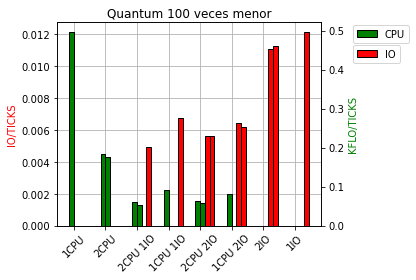

In [223]:
x_cpu1 = np.arange(len(cpu1))
x_cpu2 = np.arange(len(cpu2))
x_io1 = np.arange(len(io1))
x_io2 = np.arange(len(io2))

offset_cpu1 = np.zeros(len(cpu1))
offset_cpu2 = np.zeros(len(cpu2))
offset_io1 = np.zeros(len(io1))
offset_io2 = np.zeros(len(io2))

shorter = min(len(cpu1), len(cpu2), len(io1), len(io2))

width = 0.15 # the width of the bars

offset_cpu1[:shorter] = width/2
offset_cpu2[:shorter] = width/2
offset_io1[:shorter] = width/2
offset_io2[:shorter] = width/2


fig, ax = plt.subplots()
twin1 = ax.twinx()
rects1 = twin1.bar(x_cpu1 - offset_cpu1, cpu1, width, color ="g", edgecolor ="black")
rects2 = twin1.bar(x_cpu2 + offset_cpu2, cpu2, width, label="CPU", color ="g",  edgecolor ="black")
rects4 = ax.bar(x_io2 + 3 *offset_io1, io2, width, color = "red",  edgecolor ="black")
rects3 = ax.bar(x_io1 + 5 *offset_io1, io1, width, label="IO", color ="red",  edgecolor ="black")

# La linea ax.set_title se puede modificar para cambiar el titulo del grafico
# La line savefig se puede modificar para cambiar el nombre con el que se guarda el archivo

ax.set_xticks(x_io2)
ax.set_xticklabels(labels)
ax.set_ylabel("IO/TICKS")
#twin1.set_ylim(0, 200)
twin1.set_ylabel("KFLO/TICKS")
ax.set_title("Quantum 100 veces menor")
ax.grid(zorder=0)
ax.set_axisbelow(True)
twin1.set_axisbelow(True)
twin1.legend(loc = (1.12, 0.9))
ax.legend(loc = (1.12, 0.8))
ax.yaxis.label.set_color('red')
twin1.yaxis.label.set_color('green')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.tight_layout() 

plt.savefig("mlfq_estrella_100less.jpg", dpi=100) 